## Superhero Dataset--DATA EXPLORATION

In [2]:
# Loading the libraries

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = sns.color_palette()

In [3]:
#Loading the dataset

heroes = pd.read_csv('heroes_information.csv')
powers = pd.read_csv('super_hero_powers.csv')

In [4]:
#Looking the shape of the dataset we have taken too 

print(heroes.shape)
print(powers.shape)

(734, 11)
(667, 168)


In [5]:
heroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


 looking into the data the first five rows and columns of the dataset what is the data is saying

In [6]:
heroes.drop(["Unnamed: 0"],axis=1,inplace =True) #unsual Unnamed column name deleting the column name which is not useful

In [7]:
heroes.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


- here we can see that the column name permanentaly deleted which is not so useful by using the `drop() function`

In [8]:
heroes.name.isna().sum()

0

In [9]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


- `info()` will reveals the dataset information like range of the data 
- how many no of records entries in the dataset.
- Total no of columns in the dataset in our dataset we have 10 columns
- number of rows in the dataset
- column names
- datatypes here we have `float64(2)` is mentioned that there two types of float data types in which **Height**,**Weight** and remaining 8 are **object type**
- and the lastly memory usage

In [10]:
## Lets check the Publisher column have null values or not

heroes.Publisher.isna().sum()

15

**here we can see that column name  `Publisher` has 15 null values**

In [11]:
heroes.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


- `describe()` is reveals the some statistical elements of the data set
- Here we can see that count,mean standard deviation,min,and percentages of the of the numeriical data type
- for object type it will not calculate the stastical elements

In [12]:
heroes.loc[heroes['name']=="Superman",'Alignment']  

646    good
Name: Alignment, dtype: object

In [13]:
heroes.loc[heroes['name']=="Thanos","Alignment"]

657    bad
Name: Alignment, dtype: object

In [14]:
# checking the Alignment column unique values
heroes.Alignment.unique()

array(['good', 'bad', '-', 'neutral'], dtype=object)

In [15]:
heroes.Alignment.value_counts()

good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

In [16]:
heroes.name.isna().sum() # Checking the column name does it have null values

0

NO `NULL` values

In [17]:
heroes.replace(to_replace = '-',value = "unknown",inplace =True)

In [18]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [19]:
heroes['Weight'].value_counts()

-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
         ... 
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

In [20]:
heroes[heroes.Weight.isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,unknown,unknown,Kaiju,unknown,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,unknown,good,NaN


In [21]:
heroes.replace(-99.0,np.nan,inplace = True)

In [22]:
heroes.Weight.isna().sum()

239

In [23]:
heroes.Weight.value_counts().index

Float64Index([ 54.0,  79.0,  81.0,  90.0,  52.0,  86.0,  59.0,  77.0,  56.0,
               61.0,
              ...
               27.0,  47.0, 178.0, 132.0,  25.0, 412.0,  38.0,  96.0, 320.0,
              855.0],
             dtype='float64', length=134)

In [24]:
ht_wt = heroes[['Height','Weight']]

**here I have cretaed the seperate height and weight columns from the data.**

In [25]:
ht_wt.head()

,Height,Weight
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,NaN,NaN


this is the overview of the data which we have seperated from the dataset

In [26]:
heroes.columns # here column names which i did not changes the dataset rathere i have created seperate dataframe for ht adn wt

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [27]:
heroes_without_h_w  = heroes.drop(["Height","Weight"],axis = 1)


In [28]:
#Impute these values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median') #creating the class for simpleimputer using median values


X = imputer.fit_transform(ht_wt)
heroes_h_w = pd.DataFrame(X, columns = ht_wt.columns)


In [29]:
heroes_h_w.head(2)

,Height,Weight
0,203.0,441.0
1,191.0,65.0


In [30]:
heroes_without_h_w = heroes.drop(['Height','Weight'],axis = 1)
heroes = pd.concat([heroes_without_h_w, heroes_h_w],axis =1)
heroes.head()

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,unknown,good,203.0,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,good,191.0,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,DC Comics,red,good,185.0,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,Marvel Comics,unknown,bad,203.0,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,Marvel Comics,unknown,bad,183.0,81.0


In [31]:
print(X)

[[203. 441.]
 [191.  65.]
 [185.  90.]
 ...
 [ 66.  17.]
 [170.  57.]
 [185.  81.]]


In [32]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Height        734 non-null float64
Weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [33]:
heroes_h_w.isna().sum() # Seeing na's in the dataframe

Height    0
Weight    0
dtype: int64

In [34]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Height        734 non-null float64
Weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


## Some Intuition

In [35]:
heroes['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Shueisha               4
ABC Studios            4
Icon Comics            4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Microsoft              1
Titan Books            1
South Park             1
Hanna-Barbera          1
Rebellion              1
J. K. Rowling          1
J. R. R. Tolkien       1
Universal Studios      1
Name: Publisher, dtype: int64

In [36]:
heroes.loc[heroes['Publisher']== 'Microsoft'] #knowing the name of the comic

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight
435,Master Chief,Male,brown,Human / Altered,Brown,Microsoft,unknown,good,213.0,81.0


In [37]:
publisher_series = heroes['Publisher'].value_counts() 

In [38]:
#distribution of publishers by %publications

publishers = list(publisher_series.index)
publications = list((publisher_series/publisher_series.sum())*100)


In [39]:
publishers[:5] #looking into first five publishers as i tried to convert into list

['Marvel Comics',
 'DC Comics',
 'NBC - Heroes',
 'Dark Horse Comics',
 'George Lucas']

In [40]:
publications[:5] #since in percentage 53% all the total

[53.963838664812236,
 29.902642559109875,
 2.642559109874826,
 2.5034770514603615,
 1.9471488178025034]

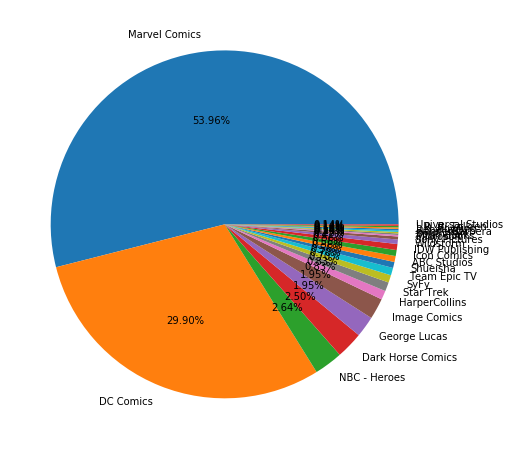

In [41]:
plt.pie(publications,labels = publishers,colors = colors,
       autopct='%1.2f%%')

fig = plt.gcf()
fig.set_size_inches(10,8)

plt.show()

Here the data is very huge cannot be plot using simple pie plots lets try to use plotly

In [42]:
#pip install plotly
#Uisng conda----> conda install -c anaconda plotly

import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected = True)

In [43]:
draw = go.Pie(labels = publishers,values = publications)

layout = go.Layout(
    title = "%age of Publications by Publishers",
    height = 650,
    width  = 650
)

data = [draw]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'publications-by-publishers')

In [44]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Height        734 non-null float64
Weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [45]:
heroes.loc[heroes['name'] == 'Deadpool']

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight
212,Deadpool,Male,brown,Mutant,No Hair,Marvel Comics,unknown,neutral,188.0,95.0


In [46]:
heroes.Alignment.value_counts().index

Index(['good', 'bad', 'neutral', 'unknown'], dtype='object')

In [47]:
df = pd.DataFrame(columns = ["Publishers","total-heroes","total-villans",'total-neutral',"total-unknown"])

for publisher in publishers:
    data = []
    data.append(publisher)
    data.append(len(heroes.loc[(heroes['Alignment']=='good') & (heroes['Publisher']==publisher),'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='bad') & (heroes['Publisher']==publisher),'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='neutral') & (heroes['Publisher']==publisher),'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='unknown') & (heroes['Publisher']==publisher),'name']))
    
    
    df.loc[len(df)] = data
    

In the Dataframe I tried to number of total

In [48]:
df

,Publishers,total-heroes,total-villans,total-neutral,total-unknown
0,Marvel Comics,259,115,11,3
1,DC Comics,142,59,13,1
2,NBC - Heroes,16,3,0,0
3,Dark Horse Comics,12,6,0,0
4,George Lucas,8,6,0,0
5,Image Comics,2,11,0,1
6,HarperCollins,6,0,0,0
7,Star Trek,5,0,0,1
8,SyFy,5,0,0,0
9,Team Epic TV,4,1,0,0


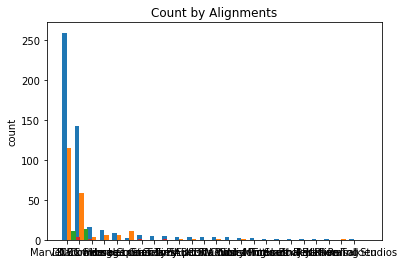

<Figure size 1296x864 with 0 Axes>

In [49]:
N = len(df)

idx = np.arange(N)
color_list = ['g','r','b','o']
gap = 0.35


plt.bar(idx,df['total-heroes'], label = 'heroes', width = gap)
plt.bar(idx + gap,df['total-villans'],label = 'villans', width = gap)
plt.bar(idx + (2*gap), df['total-neutral'],label = 'neutral', width = gap)
plt.bar(idx + (3*gap), df['total-unknown'],label = 'unknown', width = gap)


plt.ylabel('count')
plt.title('Count by Alignments')

plt.xticks(idx + gap/2, list(df['Publishers']))


plt.figure(figsize=(18,12))
plt.show()

In [50]:
#using plotly

block1 = go.Bar(
    x = list(df['Publishers']),
    y = list(df['total-heroes']),
    name = 'total-heroes'
)

block2 = go.Bar(
    x = list(df['Publishers']),
    y = list(df['total-villans']),
    name = 'total-villans'
)

block3 = go.Bar(
    x = list(df['Publishers']),
    y = list(df['total-neutral']),
    name = 'total-neutral'
)

block4 = go.Bar(
    x = list(df['Publishers']),
    y = list(df['total-unknown']),
    name = 'total-unknown'
)

data_obj = [block1,block2,block3,block4]

layout = go.Layout(
    title = 'Count of character by Alignment',
    barmode = 'group'
)

fig = go.Figure(data=data_obj, layout=layout)
py.iplot(fig,filename = 'Count of Characters by Alignment')

In [51]:
## geneder distribution by alignment

gender_series = heroes["Gender"].value_counts()

genders = list(gender_series.index)

distribution = list((gender_series/gender_series.sum())*100)

draw = go.Pie(labels = genders, values=distribution)

layout =go.Layout(
    title =   'Overall gender-wise distribution of comic character',
    height = 600,
    width = 600
)

data_obj = [draw]

fig = go.Figure(data = data_obj, layout = layout)
py.iplot(fig,filename = 'gender-wise distribution of comic characters')

In [52]:
#gender Distribution by alignment


heroes_gender_series = heroes['Gender'].loc[heroes['Alignment']=='good'].value_counts()
heroes_genders = list(heroes_gender_series.index)
heroes_distribution = list((heroes_gender_series/heroes_gender_series.sum())*100)

villans_gender_series = heroes['Gender'].loc[heroes['Alignment']=='bad'].value_counts()
villans_genders = list(villans_gender_series.index)
villans_distribution = list((villans_gender_series/villans_gender_series.sum())*100)

neutral_gender_series = heroes['Gender'].loc[heroes['Alignment']=='neutral'].value_counts()
neutral_genders = list(neutral_gender_series.index)
neutral_distribution = list((neutral_gender_series/neutral_gender_series.sum())*100)

unknown_gender_series = heroes['Gender'].loc[heroes['Alignment']=='unknown'].value_counts()
unknown_genders = list(unknown_gender_series.index)
unknown_distribution = list((unknown_gender_series/unknown_gender_series.sum())*100)

In [53]:
fig = {
    "data":[
        {
            "labels": heroes_genders,
            "values": heroes_distribution,
            "type": "pie",
            "hole": 0.4,
            "name": "heroes",
            "domain": {"row": 0, "column": 0}
        },
        {
            "labels": villans_genders,
            "values": villans_distribution,
            "type": "pie",
            "hole": 0.4,
            "name": "villans",
            "domain": {"row": 0, "column": 1}
        },
        {
            "labels": neutral_genders,
            "values": neutral_distribution,
            "type": "pie",
            "hole": 0.4,
            "name": "neutral",
            "domain": {"row": 1, "column": 0}
        },
        {
            "labels": unknown_genders,
            "values": unknown_distribution,
            "type": "pie",
            "hole": 0.4,
            "name": "unknown",
            "domain": {"row": 1, "column": 1}
        }
    ],
    
    "layout": {
        "title":"Gender distribution by Alignment",
        "grid": {"rows" : 2, "columns": 2},
        "annotations": [
            {"text": "Heroes", "x": 0.19, "y":0.8, "showarrow": False},
            {"text": "Villans", "x":0.82, "y": 0.77, "showarrow":False},
            {"text": "Neutrals", "x": 0.19, "y": 0.2, "showarrow": False},
            {"text": "Unknowns", "x": 0.83, "y": 0.19, "showarrow": False}
        ],
        "height": 650,
        "width": 650
    }
}

py.iplot(fig, filename="gender by alignent")


NO Gender equality

In [60]:
male_df =  heroes.loc[heroes['Gender'] == 'Male']
female_df = heroes.loc[heroes["Gender"]== "Female"]


In [61]:
trace_m = go.Bar(
    x =male_df['Alignment'].value_counts().index,
    y =male_df['Alignment'].value_counts().values,
    name='male'
    
)
trace_f = go.Bar(
    x =female_df['Alignment'].value_counts().index,
    y =female_df['Alignment'].value_counts().values,
    name='female'
)

data_obj = [trace_m,trace_f]

layout = go.Layout(
    title = "character by their gender by alignment",
    barmode = 'group'
)

fig = go.Figure(data = data_obj,layout= layout)
py.iplot(fig,filename = 'gencer by alignment')

In [62]:
heroes.head(2)

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,unknown,good,203.0,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,good,191.0,65.0


In [64]:
heroes.Race.unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', 'unknown', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Kaiju', 'Saiyan', 'Gorilla',
       'Rodian', 'Flora Colossus', 'Human-Vuldarian', 'Asgardian',
       'Demi-God', 'Eternal', 'Gungan', 'Bolovaxian', 'Animal',
       'Czarnian', 'Martian', 'Spartoi', 'Planet', 'Luphomoid',
       'Parademon', 'Yautja', 'Maiar', 'Clone', 'Talokite', 'Korugaran',
       'Zombie', 'Human-Vulcan', 'Human-Spartoi', 'Tamaranean',
       'Frost Giant', 'Mutant / Clone', "Yoda's species"], dtype=object)

In [68]:
trace = go.Bar(
    x = heroes['Race'].value_counts().index,
    y = heroes['Race'].value_counts().values,
    name = "Races"
)

layout  = go.Layout(
    title = "distribution across different races"
)
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig,filename = 'distribution across different races')

In [72]:
heroes.loc[heroes.name == 'Goku'] #retrieving name of the hero from te data set

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight
288,Goku,Male,unknown,Saiyan,unknown,Shueisha,unknown,good,175.0,62.0


In [73]:
heroes['Hair color'].unique()

array(['No Hair', 'Black', 'Blond', 'Brown', 'unknown', 'White', 'Purple',
       'Orange', 'Pink', 'Red', 'Auburn', 'Strawberry Blond', 'black',
       'Blue', 'Green', 'Magenta', 'Brown / Black', 'Brown / White',
       'blond', 'Silver', 'Red / Grey', 'Grey', 'Orange / White',
       'Yellow', 'Brownn', 'Gold', 'Red / Orange', 'Indigo',
       'Red / White', 'Black / Blue'], dtype=object)

## Characters like prof X(X-men)

In [74]:
heroes.loc[heroes['Hair color']=='No Hair',"name"]

0             A-Bomb
1         Abe Sapien
2           Abin Sur
3        Abomination
5      Absorbing Man
           ...      
699           Vision
700        Vision II
703          Vulture
727      Yellow Claw
730             Ymir
Name: name, Length: 75, dtype: object

In [78]:
#distribution of bald and character with hair

heroes['bald_or_not'] = heroes['Hair color'].where(heroes['Hair color'] == 'No Hair', other = "Hair")
heroes.head()

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight,bald_or_not
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,unknown,good,203.0,441.0,No Hair
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,good,191.0,65.0,No Hair
2,Abin Sur,Male,blue,Ungaran,No Hair,DC Comics,red,good,185.0,90.0,No Hair
3,Abomination,Male,green,Human / Radiation,No Hair,Marvel Comics,unknown,bad,203.0,441.0,No Hair
4,Abraxas,Male,blue,Cosmic Entity,Black,Marvel Comics,unknown,bad,183.0,81.0,Hair


In [79]:
trace = go.Bar(
    x = heroes['bald_or_not'].value_counts().index,
    y = heroes['bald_or_not'].value_counts().values,
    name= 'blad vs not bald',
    text = ['not bald','bald']
)
layout = go.Layout(
    title = 'bald vs not bald '
)

fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig,filename= 'bald vs not bald')

In [80]:
powers.head() # here the dataset consists of only boolean type .

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
powers = powers*1 #So i think that multiply with will give us good picture of evry column 
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So here is the dataset which is multiplied with 1 and gives us very formulated dataset which is ready to explore now

## Most Powerful Comic Character

In [84]:
powers.loc[:,'total_powers'] = powers.iloc[:,1:].sum(axis =1)
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total_powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [85]:
powers[['hero_names','total_powers']].head(10)

,hero_names,total_powers
0,3-D Man,4
1,A-Bomb,7
2,Abe Sapien,16
3,Abin Sur,1
4,Abomination,8
5,Abraxas,14
6,Absorbing Man,11
7,Adam Monroe,3
8,Adam Strange,10
9,Agent Bob,1


In [87]:
##Most Powerful superhero
powers.sort_values(by = 'total_powers',ascending = False).head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total_powers
563,Spectre,1,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,49
18,Amazo,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,44
394,Martian Manhunter,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,35
370,Living Tribunal,1,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,35
388,Man of Miracles,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,34


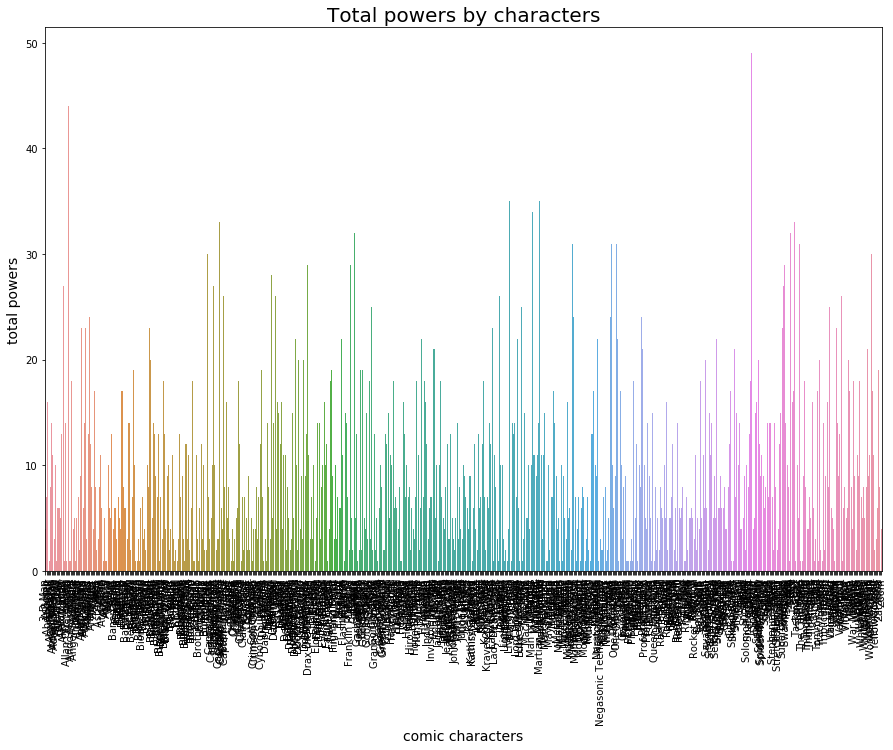

In [89]:
#Using Seaborn

plt.figure(figsize=(15,10))
sns.barplot(powers['hero_names'],powers['total_powers'],alpha = 1)
plt.title('Total powers by characters',fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('total powers',fontsize = 14)
plt.xlabel("comic characters",fontsize= 14)
plt.show()

In [91]:
#Using Plotly

trace = go.Bar(
    x= powers['hero_names'],
    y = powers['total_powers'],
    text = ['names','total_powers']
)

layout = go.Layout(
    title = "Comic character by total powers they have"
)
fig = go.Figure(data = [trace],layout= layout)
py.iplot(fig,filename = 'Most powerful superhero')

In [93]:
top_30_powerful = powers.sort_values('total_powers',ascending = False).head(30)
trace = go.Bar(
    x= top_30_powerful['hero_names'],
    y = top_30_powerful['total_powers'],
    text = ['nmaes','total_powers']
)
layout = go.Layout(
    title = 'Top30 most powerful hero'
)
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig,filename = 'top 30')